In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())

In [3]:
df = pd.read_csv('imputeData2017.csv' , encoding = "big5")
df_nonull = df.dropna()
x = df_nonull.drop(['PM2.5','Daye','Time'], axis=1)
y = df_nonull['PM2.5']
x.head(3)

,Air Pressure,Air Temperature,Relative Humidity,Wind Speed,Precipitation
0,970.3,15.6,94.0,0.3,0.0
1,970.0,15.2,94.0,0.0,0.0
2,969.8,14.7,98.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
Daye                 8760 non-null object
Time                 8760 non-null int64
Air Pressure         8760 non-null float64
Air Temperature      8760 non-null float64
Relative Humidity    8760 non-null float64
Wind Speed           8760 non-null float64
Precipitation        8760 non-null float64
PM2.5                8760 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 547.6+ KB


In [5]:
df.describe()

,Time,Air Pressure,Air Temperature,Relative Humidity,Wind Speed,Precipitation,PM2.5
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.500000,962.873502,22.525309,83.057954,0.890812,0.320988,24.625568
std,6.922582,4.397354,4.956583,16.285166,0.795717,2.220969,14.448751
min,1.000000,940.400000,9.100000,24.000000,0.000000,0.000000,2.000000
25%,6.750000,960.100000,19.100000,70.000000,0.400000,0.000000,14.000000
50%,12.500000,962.700000,22.900000,89.000000,0.600000,0.000000,22.000000
75%,18.250000,965.700000,25.800000,98.000000,1.200000,0.000000,33.000000
max,24.000000,977.300000,36.200000,99.000000,5.700000,68.500000,127.000000


In [6]:
df.isnull()

,Daye,Time,Air Pressure,Air Temperature,Relative Humidity,Wind Speed,Precipitation,PM2.5
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False


Text(0.5, 115.20937499999997, '特徵')

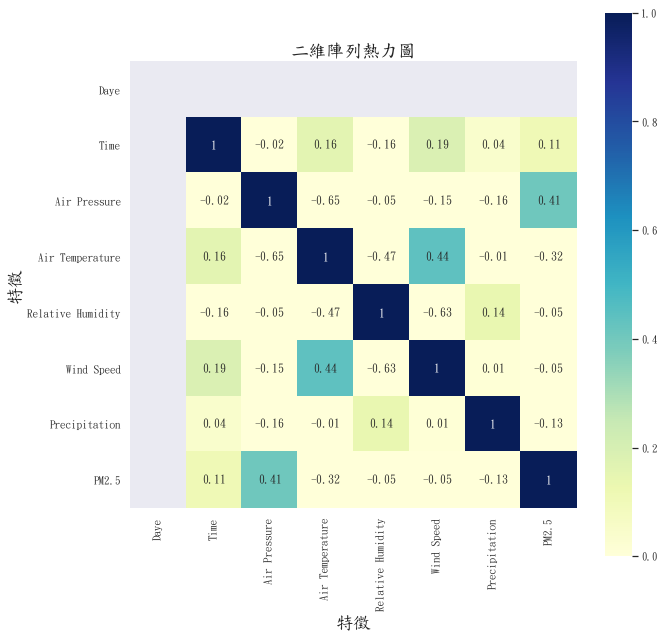

In [7]:
a = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
#二維的陣列的熱力圖，橫軸和數軸的ticklabels要加上去的話，既可以通過將array轉換成有column
#和index的DataFrame直接繪圖生成，也可以後續再加上去。後面加上去的話，更靈活，包括可設定labels大小方向等。
sns.heatmap(pd.DataFrame(np.round(a,2), columns =df.columns, index = df.columns), 
                annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")
#sns.heatmap(np.round(a,2), annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, 
#            square=True, cmap="YlGnBu")
ax.set_title('二維陣列熱力圖', fontsize = 18)
ax.set_ylabel('特徵', fontsize = 18)
ax.set_xlabel('特徵', fontsize = 18) #橫變成y軸，跟矩陣原始的佈局情況是一樣的

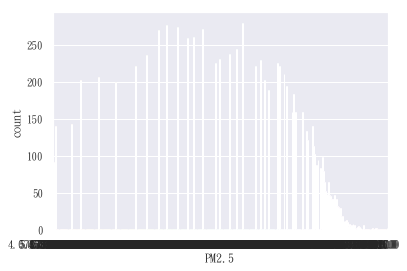

In [8]:
sns.countplot(y)

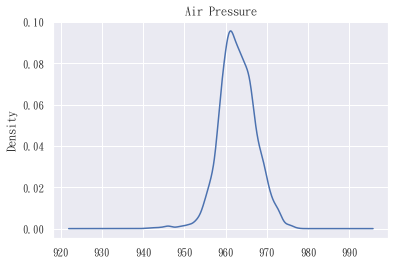

標準差 : 4.397354270733905


In [9]:
df2=df['Air Pressure']


df2.plot(kind='kde',title='Air Pressure')
plt.show()

print('標準差 :',df2.std())

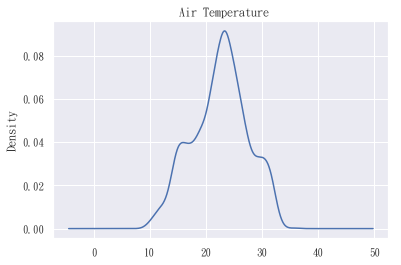

標準差 : 4.956583399183954


In [10]:
df2=df['Air Temperature']


df2.plot(kind='kde',title='	Air Temperature')
plt.show()

print('標準差 :',df2.std())

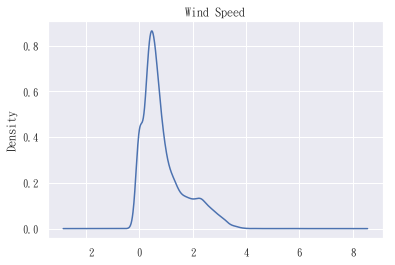

標準差 : 0.7957173370243045


In [11]:
df2=df['Wind Speed']


df2.plot(kind='kde',title='Wind Speed')
plt.show()

print('標準差 :',df2.std())

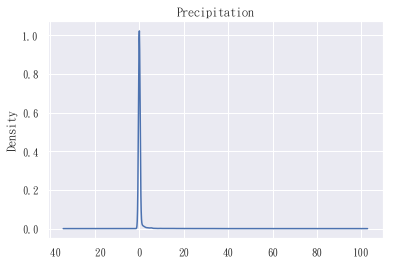

標準差 : 2.2209687300026455


In [12]:
df2=df['Precipitation']


df2.plot(kind='kde',title='Precipitation')
plt.show()

print('標準差 :',df2.std())

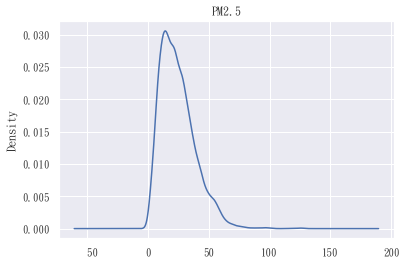

標準差 : 14.448751272619385


In [13]:
df2=df['PM2.5']


df2.plot(kind='kde',title='PM2.5')
plt.show()

print('標準差 :',df2.std())

異常値:  [ 63.  63.  63.  64.  62.  63.  62.  62.  65.  67.  68.  64.  66.  70.
  69.  75.  80.  80.  80.  76.  69.  66.  64.  65.  63.  64.  64.  65.
  62.  70.  77.  70.  67.  71.  73.  72.  67.  63.  64.  63.  96. 123.
 126. 127. 127. 124. 116. 101.  95.  99.  98.  90.  89.  84.  86. 102.
  91.  76.  91.  94.  87.  75.  69.  65.  69.  71.  71.  64.  62.  62.
  65.  65.  64.  66.  63.  64.  62.  65.  68.  67.  70.  67.  65.  71.
  74.  66.  63.  64.  64.  62.  65.  63.  62.  67.  70.  62.  65.  74.
  77.  74.  75.  67.  77.  85.  79.  69.  68.  72.  69.  64.  63.  71.
  69.  64.  66.  71.  68.  62.  70.  75.  80.  80.  74.  76.  76.  75.
  70.  67.  70.  68.  80.  96.  97.  97.  83.  63.  62.]


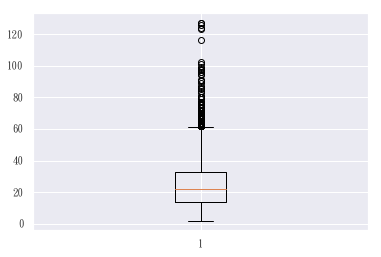

In [14]:
# plt.boxplot(y,showfliers=True)
# plt.show()

r=plt.boxplot(y,showfliers=True)

print('異常値: ',r['fliers'][0].get_data()[1])#取得異常値

In [15]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=5, random_state=0,
                       n_estimators=100)

In [16]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.01)
sfm.fit(x,y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=5,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.01)

In [17]:
print(sfm.get_support())
count = -1 
for i in sfm.get_support() :
    count += 1
    if i == True:
        print(count)


[ True  True  True  True  True]
0
1
2
3
4


In [18]:
# ##隨機燊齡補植 但已經採用 R 補植好的資料
# # y即目标年龄
# y = df_nonull[:, 0]

# # X即特征属性值
# X = df_nonull[:, 1:]

# # fit到RandomForestRegressor之中
# rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
# rfr.fit(X, y)

#  # 用得到的模型进行未知年龄结果预测
# predictedAges = rfr.predict(unknown_age[:, 1:])
# #     print predictedAges
# # 用得到的预测结果填补原缺失数据
# df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, y , test_size=0.2, random_state=0)
y_trainn = np.array(y_train)

In [20]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(x)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

第1次 12.965303258970467 [1.2209865  0.86027533]
第2次 12.7434093512434 [1.66663451 2.11915697]
第3次 12.553077020432301 [1.97398759 2.81698269]
第4次 12.355615176640134 [2.8312694  4.53356321]
第5次 12.167064597785956 [3.8091226  6.31430684]
第6次 12.080883630960146 [4.3762782  8.61952589]
第7次 11.931885194513606 [ 6.40545717 12.47017058]
第8次 11.811882339299649 [ 7.55150292 16.34787617]
第9次 11.671899860194419 [ 9.82745892 21.9418026 ]
第10次 11.563413926271146 [12.22431259 27.01860393]
第11次 11.437224272081934 [15.21051604 32.45141389]
第12次 11.330530312755208 [19.27430236 37.19539906]
第13次 11.225813992639178 [23.8861236  42.26762421]
第14次 11.135383500070631 [29.71810742 47.02080064]
第15次 11.060569087597864 [34.78920037 52.03206016]
第16次 10.999120627016909 [37.98920037 55.23206016]
第17次 10.959742971801894 [41.74855233 59.32152983]
第18次 10.882069165083022 [46.7567602  64.02793226]
第19次 10.801700065970753 [51.28695392 69.50908246]
第20次 10.72202867551785 [56.62879651 74.35898259]
第21次 10.65846549770464 [

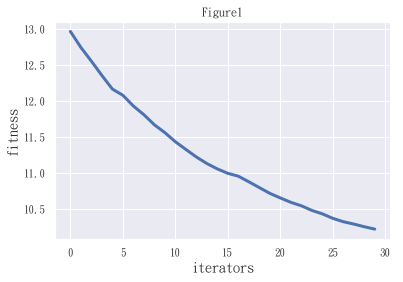

In [32]:
# coding: utf-8
from sklearn.tree import DecisionTreeRegressor
import numpy as np  
import random   
import matplotlib.pyplot as plt  
max_iter=30 # 跌帶次數
pN = 60  # 人口
clf = DecisionTreeRegressor(max_depth = 1 , max_leaf_nodes = 2 )
#----------------------PSO参数设置---------------------------------  
class PSO():  
    def __init__(self,pN,dim,max_iter):  
        self.w = 0.8    
        self.c1 = 1.96     
        self.c2 = 1.96     
        self.r1= 0.6  
        self.r2=0.3
        self.Vbest = 1.5             # 最高速度
        self.pN = pN                #粒子数量  
        self.dim = dim              #搜索维度  
        self.max_iter = max_iter    #迭代次数  
        self.X = np.zeros((self.pN,self.dim))       #所有粒子的位置和速度  
        self.V = np.zeros((self.pN,self.dim))  
        self.pbest = np.zeros((self.pN,self.dim))   #個體經歷的最佳位置和全局最佳位置  
        self.gbest = np.zeros((1,self.dim))  
        self.p_fit = np.zeros(self.pN)              #每個個體的歷史最佳值  
        self.fit = 1e10             #全局最佳值  
          
#---------------------目标函数Sphere函数-----------------------------  
    def function(self,x): 
        clf = DecisionTreeRegressor(max_depth = int(x[0]) + 1 , max_leaf_nodes = int(x[1]) + 2 )
        clf.fit(X_train_std,y_train)
        pred = clf.predict(X_train_std)
        n = X_train.shape[0] 
        rmse = 0.0
        for i in range(n):
            rmse += (pred[i] - y_trainn[i]) ** 2
        rmse = (rmse/n) ** 0.5
        return rmse
#---------------------初始化种群----------------------------------  
    def init_Population(self):  
        for i in range(self.pN):  
            for j in range(self.dim):  
                self.X[i][j] = random.uniform(0,1)  
                self.V[i][j] = random.uniform(0,1)  
            self.pbest[i] = self.X[i]  
            tmp = self.function(self.X[i])  
            self.p_fit[i] = tmp  
            if(tmp < self.fit):  
                self.fit = tmp  
                self.gbest = self.X[i]  
      
#----------------------更新粒子位置----------------------------------  
    def iterator(self):  
        fitness = []  
        for t in range(self.max_iter):  
            for i in range(self.pN):         #更新gbest\pbest  
               temp = self.function(self.X[i])  
               if(temp<self.p_fit[i]):      #更新个体最优  
                   self.p_fit[i] = temp  
                   self.pbest[i] = self.X[i]  
                   if(self.p_fit[i] < self.fit):  #更新全局最优  
                       self.gbest = self.X[i]  
                       self.fit = self.p_fit[i]  
            for i in range(self.pN): 
                temp = self.w*self.V[i] + self.c1*self.r1*(self.pbest[i] - self.X[i]) + \
                            self.c2*self.r2*(self.gbest - self.X[i])  
                for z in range(self.dim):
                    if temp[z]  >= self.Vbest:
                        temp[z] = self.Vbest
                self.V[i] = temp
                self.X[i] = self.X[i] + self.V[i]  
            fitness.append(self.fit)  
            print("第%d次" %  (t + 1) ,self.fit,self.gbest)                   #输出最优值  
        return fitness  
 
#----------------------程序执行-----------------------  
my_pso = PSO(pN=pN,dim=2,max_iter=max_iter)  
my_pso.init_Population()  
fitness = my_pso.iterator()
#-------------------画图--------------------  
plt.figure(1)  
plt.title("Figure1")  
plt.xlabel("iterators", size=14)  
plt.ylabel("fitness", size=14)  
t = np.array([t for t in range(0,max_iter)])  
fitness = np.array(fitness)  
plt.plot(t,fitness, color='b',linewidth=3)  
plt.show()

In [34]:
clf = DecisionTreeRegressor(max_depth = 40 , max_leaf_nodes = 41 )
clf.fit(X_train_std,y_train)
pred = clf.predict(X_test_std)
n = X_test_std.shape[0] 
rmse = 0.0
y_testt = np.array(y_test)
for i in range(n):
    rmse += (pred[i] - y_testt[i]) ** 2
rmse = (rmse/n) ** 0.5
print("RMSE" , rmse)
    

RMSE 12.180751350503513
